In [1]:
import os,glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rc("font",family="Arial")

In [3]:
dfsoma = pd.read_csv("All_soma_infor_HY_neurons.csv",index_col=0)

In [5]:
dfsomaplot = dfsoma.pivot_table(index="location",values="name",aggfunc="count")

In [6]:
areas = ['LHA', 'VMH', 'AHN', 'PH', 'PVH', 'MBO', 'TU', 'MPO', 'DMH', 'ARH', 'MPN',
 'ZI', 'PVHd', 'PMv', 'LPO', 'PeF', 'PSTN', 'PMd', 'PVp', 'RCH', 'AVP', 'SBPV', 'STN',
 'VMPO', 'AVPV', 'ME', 'ADP', 'PS', 'SO', 'VLPO', 'PVi', 'PVa', 'PST', 'PD', 'MEPO',
 'SCH', 'ASO', 'PVpo' ]

In [7]:
dfsomaplot = dfsomaplot.loc[areas,:]

In [8]:
dfvol = pd.read_csv("Allen_volumne.csv",index_col=0)

In [9]:
dfvol2 = dfvol.T.loc[areas,:] 

In [10]:
dfplot = pd.concat([dfsomaplot,dfvol2],axis=1)

In [11]:
dfplot["intensity"] = dfplot["name"]/dfplot["voxel"]*2000000

In [11]:
dfplot = dfplot.reset_index()

In [15]:
dfplot

,name,voxel,intensity
LHA,913,2064508,884.472233
VMH,631,549454,2296.825576
AHN,402,710594,1131.447775
PH,400,707114,1131.359300
PVH,399,188750,4227.814570
MBO,358,1015810,704.856223
TU,292,523216,1116.173817
MPO,280,555530,1008.046370
DMH,249,376062,1324.249725
ARH,229,284936,1607.378499


In [13]:
color = ['red','green','blue', 'cyan', 'magenta', 'yellow',"brown","darkred","gray","navy","orange","gold","skyblue","tomato","teal"]
color_bar = color+["gray"]*(len(dfplot)-len(color))

In [16]:
dfplot["color"] = color_bar

In [22]:
dfplot2 = dfplot.sort_values(by = "intensity",ascending=False).reset_index()


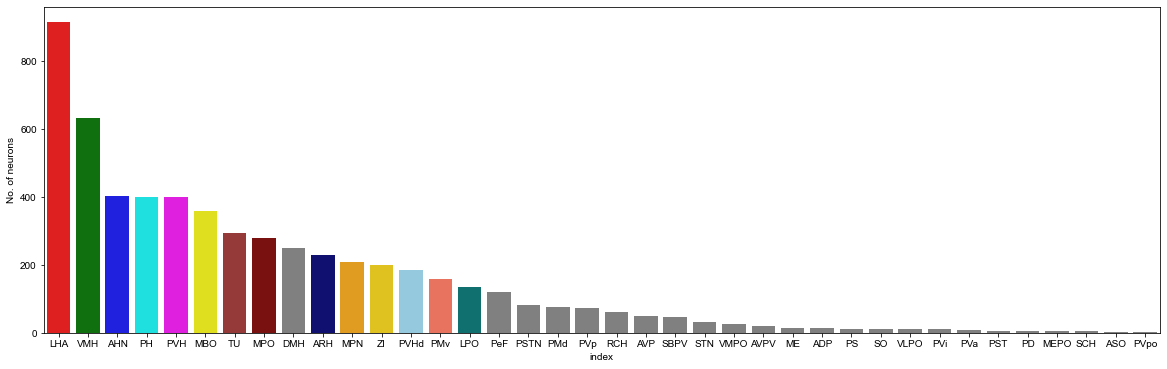

In [30]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(data=dfplot,x= "index", y ="name",palette = color_bar)
# sns.swarmplot(data=dfplot,edgecolor="black",linewidth= 0.5,size = 2)
plt.ylabel('No. of neurons')
plt.savefig("soma_number_distrubtion.pdf",dpi =600,format="pdf")

In [24]:
dfplot2.color.tolist()

['magenta',
 'skyblue',
 'green',
 'tomato',
 'navy',
 'gray',
 'gray',
 'gray',
 'blue',
 'cyan',
 'gray',
 'brown',
 'gray',
 'gray',
 'orange',
 'darkred',
 'gray',
 'gray',
 'gray',
 'gray',
 'red',
 'gray',
 'gray',
 'yellow',
 'gray',
 'teal',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gold',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray']

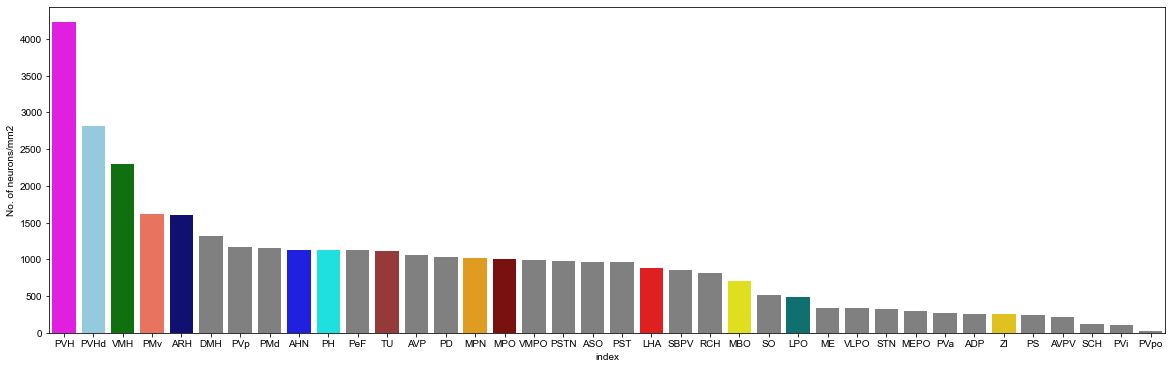

In [25]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(data=dfplot2,x= "index", y ="intensity",palette = dfplot2.color.tolist())
# sns.swarmplot(data=dfplot,edgecolor="black",linewidth= 0.5,size = 2)
plt.ylabel('No. of neurons/mm2')
plt.savefig("soma_intensity_distrubtion2.pdf",dpi =600,format="pdf")